In [148]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

Nc = 16
Nq = 3

epsilon = 0e6 * 2 * np.pi # note how the power has units of frequency here - a rate of photon addition
w_c  = 2 * np.pi * 5.0e9 # resonator frequency
w_q  = 2 * np.pi * 4e9 # qubit frequency
w_1 = 2 * np.pi * 5.0e9  # drive
phi_1 = 0*np.pi/2 # phase
kappa = 1e6 * 2 * np.pi           # cavity dissipation rate
alpha = 200e6 * 2 * np.pi
g = 100e6 * 2 * np.pi
T = 0
gamma = 0e6 * 2 * np.pi

c  = tensor(destroy(Nc), qeye(Nq))

q = tensor(qeye(Nc), destroy(Nq))

tlist = np.linspace(0, 2e-6, 20000)

H0 = w_c * c.dag() * c + w_q * q.dag() * q + alpha/2*q.dag()*q.dag()*q*q + g*(c.dag() + c)*(q.dag() + q)

H1_I = c # quadratures of the drive

H1_Q = c.dag()

cav_drive = epsilon*np.exp(1j*w_1*tlist + 1j*phi_1)

H = [[H0, tlist*0 + 1],[H1_I,cav_drive],[H1_Q,np.conj(cav_drive)]]

H0.eigenenergies()/(2*np.pi)

c_op_list = []

rate = gamma * (1 + T)
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * q)

rate = gamma * T
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * q.dag())

rate = kappa
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * c)

psi_0 = tensor(coherent(Nc, 2), (fock(Nq, 0) + fock(Nq, 1))/np.sqrt(2))

In [149]:
result = mesolve(H, psi_0, tlist, c_ops = c_op_list)

KeyboardInterrupt: 

In [ ]:
# i = 0

# fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# axes[0].cla()
# plot_fock_distribution(result.states[i], fig=fig, ax=axes[0])
# plot_wigner(result.states[i], fig=fig, ax=axes[1])
# plt.show()

i = -1

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].cla()
plot_fock_distribution(result.states[i].ptrace(0), fig=fig, ax=axes[0])
plot_wigner(result.states[i].ptrace(0), fig=fig, ax=axes[1])
plt.show()

In [ ]:
psi_qb = result.states[i].ptrace(1)

In [ ]:
(psi_qb*psi_qb).tr()

In [ ]:
H0.eigenstates()[0]/(2*np.pi)

In [ ]:
(fock(Nq, 0) + fock(Nq, 1))/np.sqrt(2)

In [ ]:
result.states[i].ptrace(1)

In [ ]:
purity = tlist*0

for i in range(0, len(tlist)):
    
    psi_qb = result.states[i].ptrace(1)
    purity[i] = np.abs((psi_qb*psi_qb).tr())
    
plt.plot(tlist, purity)
plt.ylabel('Purity')
plt.xlabel('Time')
    

## Purity of single oscillator state under decay

The un-approximated dynamics of qubit-resonator dynamics may be complicated. If we only want to consider information flow, it may be helpful to consider just a single oscillator under decay.

In [61]:
N = 16

epsilon = 0e6 * 2 * np.pi # note how the power has units of frequency here - a rate of photon addition
w_c  = 2 * np.pi * 5.0e9 # resonator frequency
w_1 = 2 * np.pi * 5.0e9  # drive
kappa = 10e6 * 2 * np.pi           # cavity dissipation rate
T = 0.9

c  = destroy(N)

tlist = np.linspace(0, 1e-7, 1000)

H0 = w_c * c.dag() * c

H1_I = c # quadratures of the drive

H1_Q = c.dag()

cav_drive = epsilon*np.exp(1j*w_1*tlist + 1j*phi_1)

H = [[H0, tlist*0 + 1],[H1_I,cav_drive],[H1_Q,np.conj(cav_drive)]]

H0.eigenenergies()/(2*np.pi)

c_op_list = []

rate = kappa * (1 + T)
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * c)

rate = kappa * T
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * c.dag())


psi_0 = coherent(N, 0)

In [62]:
result = mesolve(H, psi_0, tlist, c_ops = c_op_list)

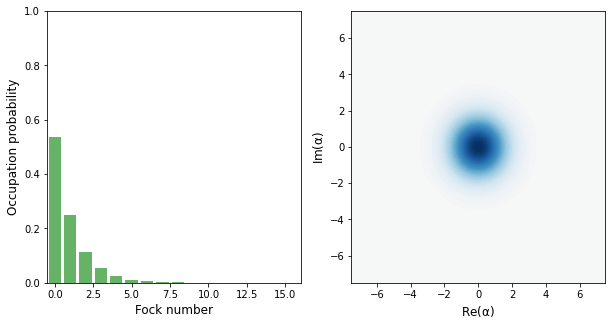

0.3673151902871337

In [64]:
i = 500

psi = result.states[i]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].cla()
plot_fock_distribution(result.states[i], fig=fig, ax=axes[0])
plot_wigner(result.states[i], fig=fig, ax=axes[1])
plt.show()

(psi*psi).tr()

# Purity of qubit under decay

Here we look at the other subsystem - the qubit. We start with a X eigenstate (not a stationary state).

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

Nq = 10

w_q  = 2 * np.pi * 4e9 # qubit frequency

alpha = 200e6 * 2 * np.pi
g = 100e6 * 2 * np.pi
T = 0.1
gamma_1 = 10e6 * 2 * np.pi
gamma_phi = 0e6 * 2 * np.pi

q = destroy(Nq)

tlist = np.linspace(0, 1e-7, 1000)

H0 = w_q * q.dag() * q + alpha/2*q.dag()*q.dag()*q*q

H = H0

H0.eigenenergies()/(2*np.pi)

c_op_list = []

rate = gamma_1 * (1 + T)
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * q)

rate = gamma_1 * T
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * q.dag())
    
rate = gamma_phi
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * (q*q.dag()))

psi_0 = (fock(Nq, 0) + fock(Nq, 1))/np.sqrt(2)


In [146]:
result = mesolve(H, psi_0, tlist, c_ops = c_op_list)

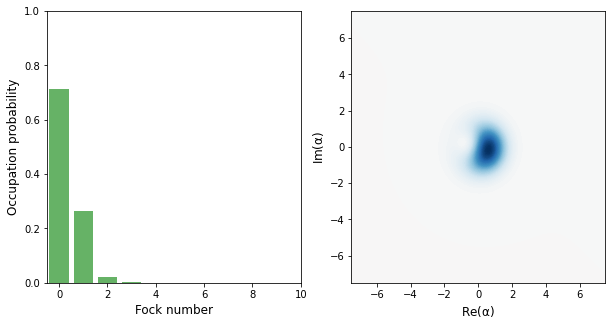

Text(0.5, 0, 'Time')

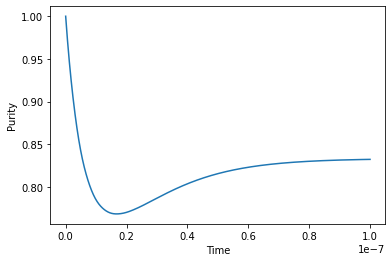

In [147]:
i = 100

rho = result.states[i]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].cla()
plot_fock_distribution(result.states[i], fig=fig, ax=axes[0])
plot_wigner(result.states[i], fig=fig, ax=axes[1])
plt.show()

purity = tlist*0
entropy = tlist*0

for i in range(0, len(tlist)):
    
    rho = result.states[i]
    purity[i] = np.abs((rho*rho).tr())
#     entropy[i] = -(rho*rho.logm()).tr()

plt.plot(tlist, purity)
plt.ylabel('Purity')
plt.xlabel('Time')

## Undriven qubit-resonator system - degree of entanglement

Here we are interested to see how the degree of entanglement evolves under a dispersive interaction with no loss. Note here that it is critical to use a diagonalized basis - using chi instead of g, no linear coupling - otherwise the calculation of purity will not make sense, since the bare cavity operators are not the same as the dressed ones, and the partial trace will not be as expected.

In [256]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

Nc = 16
Nq = 3

w_c  = 2 * np.pi * 5.0e9 # resonator frequency
w_q  = 2 * np.pi * 4e9 # qubit frequency
kappa = 0e6 * 2 * np.pi           # cavity dissipation rate
alpha = 200e6 * 2 * np.pi
chi = 10e6 * 2 * np.pi
T = 0
gamma = 0e6 * 2 * np.pi
K = chi**2/alpha

c  = tensor(destroy(Nc), qeye(Nq))

q = tensor(qeye(Nc), destroy(Nq))

tlist = np.linspace(0, 2e-7, 2000)

# H0 = w_c * c.dag() * c + w_q * q.dag() * q + alpha/2*q.dag()*q.dag()*q*q + g*(c.dag() + c)*(q.dag() + q)
H0 = w_c * c.dag() * c + w_q * q.dag()*q + alpha/2*q.dag()*q.dag()*q*q + chi*(c.dag()*c*q.dag()*q) + K/2*(c.dag()*c.dag()*c*c)

H = H0

c_op_list = []

rate = gamma * (1 + T)
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * q)

rate = gamma * T
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * q.dag())

rate = kappa
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * c)

# psi_0 = tensor(coherent(Nc, 2), (fock(Nq, 0) + fock(Nq, 1) + fock(Nq, 2))/np.sqrt(3))
psi_0 = tensor(coherent(Nc, 2), (fock(Nq, 0) + fock(Nq, 1))/np.sqrt(2))
# psi_0 = tensor(coherent(Nc, 2), fock(Nq, 1))

In [257]:
result = mesolve(H, psi_0, tlist, c_ops = c_op_list)

Text(0.5, 0, 'Time')

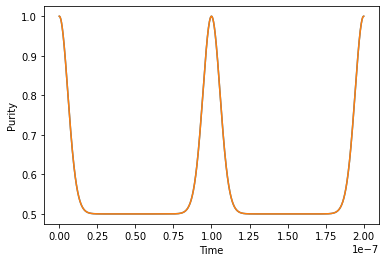

In [258]:
purity_q = tlist*0
purity_c = tlist*0

for i in range(0, len(tlist)):
    
    rho_q = result.states[i].ptrace(1)
    rho_c = result.states[i].ptrace(0)
    purity_q[i] = np.abs((rho_q*rho_q).tr())
    purity_c[i] = np.abs((rho_c*rho_c).tr())

plt.plot(tlist, purity_c)
plt.plot(tlist, purity_q)
plt.ylabel('Purity')
plt.xlabel('Time')

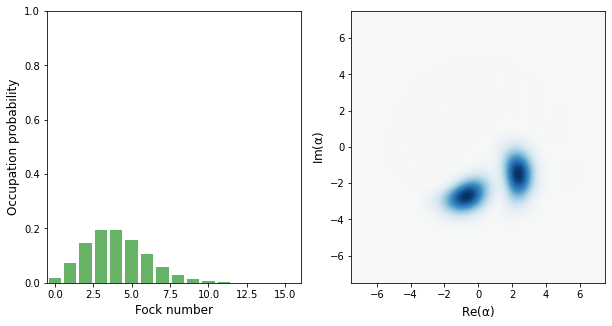

In [259]:
i = 200

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].cla()
plot_fock_distribution(result.states[i].ptrace(0), fig=fig, ax=axes[0])
plot_wigner(result.states[i].ptrace(0), fig=fig, ax=axes[1])
plt.show()